<a href="https://colab.research.google.com/github/Juyeonnn/ML-from-scratch/blob/main/custom_back_forward_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
"""
train custom model with 4 parameters to approximate tanh function
by building custom forward / backward function (not using pytorch built-in module)
"""

import torch
import math

class CustomFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return 5 * input ** 3 - 10 * input

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        # By chain rule, multiply grad_output by Differentiated forward function 
        return grad_output * (15 * input ** 2 - 10)  

dtype = torch.float
device = torch.device("cuda:0")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.tanh(x)   # approximate tanh function 

# Weight initialization
# equires_grad = True --> compute gradients during the backward pass
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

loss_history = []
learning_rate = 4e-6
for t in range(2000):

    # P3 : custom backward function
    P3 = CustomFunction.apply

    # predict y --> forward pass  
    y_pred = a + b * P3(c + d * x)

    # compute loss
    loss = (y_pred - y).pow(2).sum()
    loss_history.append(loss)
    if t % 100 == 0:
        print(t,loss.item())

    # autograd --> compute the backward pass
    loss.backward()

    # update weights
    with torch.no_grad():
        # update w = w - lr*grad
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None


0 20812.013671875
100 96.5438232421875
200 96.40664672851562
300 96.25772857666016
400 96.09526824951172
500 95.91709899902344
600 95.72050476074219
700 95.50210571289062
800 95.25752258300781
900 94.98112487792969
1000 94.66536712646484
1100 94.29998779296875
1200 93.87057495117188
1300 93.35606384277344
1400 92.72444152832031
1500 91.92401123046875
1600 90.86488342285156
1700 89.37413787841797
1800 87.06602478027344
1900 82.8572769165039


Custom Approximate Function : y = -1.3685225175308346e-10 + -0.27151772379875183 * P3(4.138949460941177e-10 + 0.18430669605731964 x)


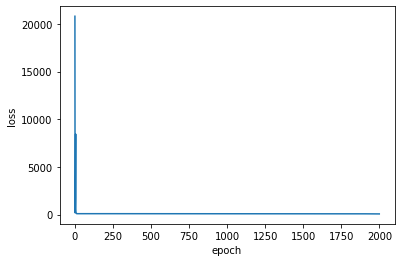

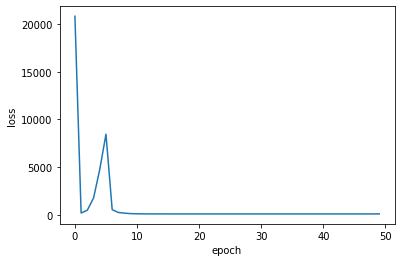

In [41]:
import matplotlib.pyplot as plt
import numpy as np

print(f'Custom Approximate Function : y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

loss_history = [l.cpu().detach().numpy() for l in loss_history]
x_len = np.arange(len(loss_history))
plt.plot(x_len,loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#show only before 50 epoch
plt.plot(x_len[:50],loss_history[:50])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

